<a href="https://colab.research.google.com/github/AlyaMF/Analysis-of-Activation-Functions-in-CNN/blob/master/Handwritten_Digit_Classification_With_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MLP to classify images from the MNIST database.
 



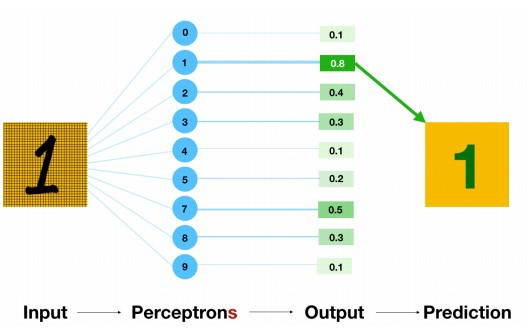

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import History 

### 1- Load Data


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Number of examples in training set of %d examples." % len(X_train))
print("Number of examples in test set of %d examples." % len(X_test))

Number of examples in training set of 60000 examples.
Number of examples in test set of 10000 examples.


###2-Sample of Training Images

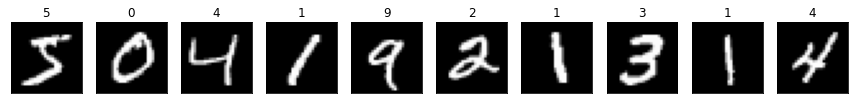

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(10):
    ax = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

###3-Rescale Images

In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

###4-One-hot encode of the labels

In [ ]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

###5-Building The Models

####5.1-simple network with a single hidden layer that has 32 nodes.

In [ ]:
model_1 = Sequential()
model_1.add(Flatten(input_shape=X_train.shape[1:]))
model_1.add(Dense(32, activation='sigmoid'))
model_1.add(Dense(10, activation='softmax'))
model_1.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


####5.2-MLP with two hidden layers and dropout between them

In [ ]:
model_2 = Sequential()
model_2.add(Flatten(input_shape=X_train.shape[1:]))
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(10, activation='softmax'))
model_2.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

###6-Train the Model

####6.1 Train The single hidden layer model

In [ ]:
history = model_1.fit(X_train, y_train, batch_size=128, epochs=10,validation_split=0.2,verbose=1, shuffle=True)


Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.9765 - accuracy: 0.7952 - val_loss: 0.4707 - val_accuracy: 0.8983
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3962 - accuracy: 0.9027 - val_loss: 0.3115 - val_accuracy: 0.9184
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2995 - accuracy: 0.9192 - val_loss: 0.2630 - val_accuracy: 0.9271
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2587 - accuracy: 0.9274 - val_loss: 0.2372 - val_accuracy: 0.9333
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2328 - accuracy: 0.9338 - val_loss: 0.2206 - val_accuracy: 0.9375
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2143 - accuracy: 0.9390 - val_loss: 0.2070 - val_accuracy: 0.9425
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1995 - accuracy: 0.9428 - val_loss: 0.1969 - val_accuracy: 0.9452
Epoch 

####6.2 Train the MLP model

In [ ]:
history = model_2.fit(X_train, y_train, batch_size=128, epochs=10,validation_split=0.2,verbose=1, shuffle=True)


Epoch 1/10
375/375 [==============================] - 5s 14ms/step - loss: 0.2783 - accuracy: 0.9145 - val_loss: 0.1273 - val_accuracy: 0.9603
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1124 - accuracy: 0.9659 - val_loss: 0.0921 - val_accuracy: 0.9747
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0810 - accuracy: 0.9751 - val_loss: 0.0927 - val_accuracy: 0.9744
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0637 - accuracy: 0.9808 - val_loss: 0.1126 - val_accuracy: 0.9703
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0519 - accuracy: 0.9844 - val_loss: 0.0893 - val_accuracy: 0.9779
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0413 - accuracy: 0.9875 - val_loss: 0.1135 - val_accuracy: 0.9743
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0358 - accuracy: 0.9888 - val_loss: 0.0956 - val_accuracy: 0.9794

###7-The Evaluation

####7.1-Single hidden layer evaluation

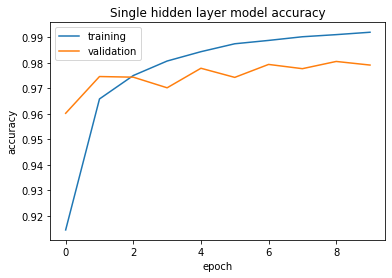

Test loss: 0.177
Test accuracy: 0.948


In [ ]:
loss, accuracy  = model_1.evaluate(X_test, y_test, verbose=False)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Single hidden layer model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

The single hidden layer model classifies 950 of the test samples correctly, therfore the model's accuracy is 95%.

####7.2-MLP evaluation

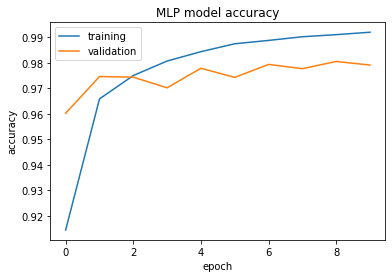

Test loss: 0.0977
Test accuracy: 0.979


In [ ]:
loss, accuracy  = model_2.evaluate(X_test, y_test, verbose=False)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

The MLP model classifies 982 of the test samples correctly, therfore the model's accuracy is 98.2%.

###8-Test predictions

####8.1-Test predictions on the single hidden layer model

In [ ]:
predictions = model_1.predict(X_test[:4])
print(np.argmax(predictions, axis = 1))
print(np.argmax(y_test[:4], axis = 1))


[7 2 1 0]
[7 2 1 0]


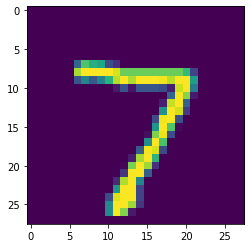

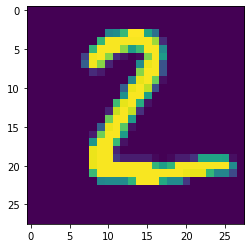

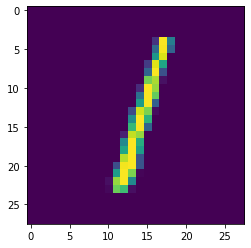

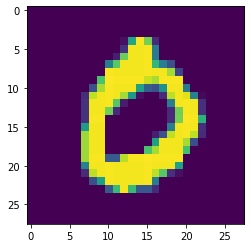

In [ ]:
for i in range(0,4):
    first_image = X_test[i]
    first_image = np.array(first_image,dtype= 'float')
    pixels = first_image.reshape((28,28))
    plt.imshow(pixels)
    plt.show()

####8.2-Test predictions on the MLP model

In [ ]:
predictions = model_2.predict(X_test[:4])
print(np.argmax(predictions, axis = 1))
print(np.argmax(y_test[:4], axis = 1))

[7 2 1 0]
[7 2 1 0]


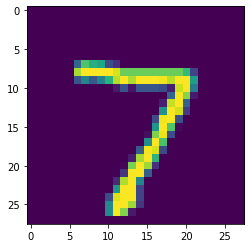

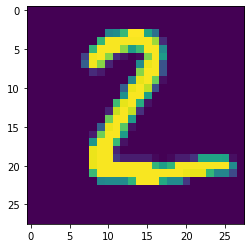

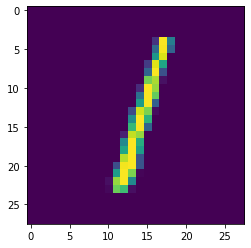

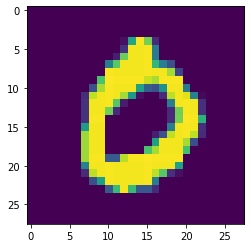

In [ ]:
for i in range(0,4):
    first_image = X_test[i]
    first_image = np.array(first_image,dtype= 'float')
    pixels = first_image.reshape((28,28))
    plt.imshow(pixels)
    plt.show()